In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import json
import pandas as pd
import numpy as np
from csv import writer
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('expand_frame_repr', False)

In [ ]:
folder_path = '/content/drive/MyDrive/Ky1nam4/DoAnCuoiKy/Data_final/data_final/content-based'

book_path = os.path.join(folder_path, 'final_books_21k.csv')
review_path = os.path.join(folder_path, 'final_reviews_21k.csv')
log_path = os.path.join(folder_path, 'log.txt')
# specification_file_path = os.path.join(folder_path, 'final_book_specification.csv')

# Errors

In [ ]:
df_error = pd.read_csv(log_path, header=None, sep=' - ', engine='python')
error_id = df_error[1].values

In [ ]:
df_error.groupby([0]).count()[[1]]

# Books

In [ ]:
df_book = pd.read_csv(book_path)
columns_vi = ['Danh mục',
              'Id',
              'URL',
              'SKU',
              'Tên',
              'Giá',
              'Trung bình đánh giá',
              'Tống số lượng đánh giá',
              'Số lượng đã bán',
              'Mô tả',
              'Thông tin chung',
              'Id nhà bán',
              'Tên nhà bán',
              'SKU nhà bán',
              'Id cửa hàng nhà bán']

In [ ]:
print(df_book)

                                                category                                                url           id           sku                                               name     price  rating_average  review_count  all_time_quantity_sold                                        description                                     specifications  seller_id    seller_sku       seller_name  seller_store_id  count_specification                                         attributes
0      Nhà sách tiki/sách tiếng việt/sách bà mẹ em bé...  https://tiki.vn/product-p141483251.html?spid=1...  141483251.0  8.070578e+12  Sách: Thai Giáo Theo Chuyên Gia - 280 Ngày Mỗi...   80500.0             5.0          58.0                   508.0  \nThai Giáo Theo Chuyên Gia, 280 Ngày, Mỗi Ngà...  {"name": "Th\u00f4ng tin chung", "attributes":...    36846.0  3.544877e+12    Minh Long Book          36125.0                    5  {'id': 141483251.0, 'publisher_vn': 'Minh Long...
1      Nhà sách tiki/sách tiếng 

In [ ]:
# danh sách các thuộc tính và tên tiếng Việt trong specifications
attr_list = []
name_list = []

# Đếm số lượng specifications trong mỗi quyển sách
def counting_specification(json_string):
    if type(json_string) is not str:
        print(f'Không phải string => {json_string}')
        return 0
    if json_string == None or json_string == '':
        print('Không có dữ liệu')
        return None
    json_data = json.loads(json_string)
    if 'name' not in json_data.keys():
        print('Không có name trong keys')
        return None
    else:
        count = 0
        for item in json_data['attributes']:
            count += 1
            if item['code'] not in attr_list:
                attr_list.append(item['code'])
                name_list.append(item['name'])
        return count
        
df_book['count_specification'] = df_book['specifications'].apply(counting_specification)

Không phải string => nan


In [ ]:
# Danh sách thuộc tính và tên tiếng Anh tương ứng
print(name_list)
print(attr_list)

['Công ty phát hành', 'Ngày xuất bản', 'Loại bìa', 'Số trang', 'Nhà xuất bản', 'Kích thước', 'Dịch Giả', 'Phiên bản', 'Lưu ý', 'Xuất xứ', 'Xuất xứ thương hiệu', 'Thương hiệu']
['publisher_vn', 'publication_date', 'book_cover', 'number_of_page', 'manufacturer', 'dimensions', 'dich_gia', 'edition', 'luu_y', 'origin', 'brand_country', 'brand']


In [ ]:
# Số lượng sách không có specification
len(df_book[df_book['count_specification'] == 0])

1

In [ ]:
# Map chuỗi json của specification của từng quyển sách
def mapping_specification(id, json_string):
    attribute_dict = {
        'id':id,
        'publisher_vn':None,
        'publisher_vn':None,
        'book_cover':None,
        'number_of_page':None,
        'manufacturer':None,
        'publication_date':None,
        'dimensions':None,
        'dich_gia':None,
        'edition':None,
        'luu_y':None,
        'brand':None,
        'origin':None,
        'brand_country':None
    }

    if type(json_string) is not str:
        return attribute_dict

    json_data = json.loads(json_string)
    if 'attributes' not in json_data.keys():
        return attribute_dict
    else:
        for item in json_data['attributes']:
            attribute_dict[item['code']] = item['value']

        return attribute_dict

In [ ]:
# Tạo cột attributes và lưu dict các thuộc tính vào
df_book['attributes'] = df_book[['id', 'specifications']].apply(lambda x: mapping_specification(x.id, x.specifications), axis=1)

In [ ]:
# Tạo biến specification_list lưu cột attributes như là một mảng
specification_list = df_book['attributes'].values

In [ ]:
type(specification_list[5473])

dict

In [ ]:
list_error = []
for i in range(len(specification_list)):
  if len(specification_list[i]) == 13:
    continue
  else:
    print(i)
    print(specification_list[i].get('id'))
    list_error.append(specification_list[i].get('id'))

5473
126120768.0
23339
115901941.0
28873
87941227.0


In [ ]:
list_error

[126120768.0, 115901941.0, 87941227.0]

In [ ]:
res = [i for i in specification_list if not (i['id'] in list_error)]

In [ ]:
res[5473]

{'id': 187384175.0,
 'publisher_vn': ' NXB Đại Học Sư Phạm',
 'book_cover': 'Bìa mềm',
 'number_of_page': '168',
 'manufacturer': 'Nhà Xuất Bản Đại Học Sư Phạm',
 'publication_date': None,
 'dimensions': None,
 'dich_gia': None,
 'edition': None,
 'luu_y': None,
 'brand': None,
 'origin': None,
 'brand_country': None}

del element error in book and reviews

In [ ]:
list_error

[126120768.0, 115901941.0, 87941227.0]

In [ ]:
df_filtered = df_book[~df_book['id'].isin(list_error) ]
print(df_filtered)

                                                category                                                url           id           sku                                               name     price  rating_average  review_count  all_time_quantity_sold                                        description                                     specifications  seller_id    seller_sku       seller_name  seller_store_id  count_specification                                         attributes
0      Nhà sách tiki/sách tiếng việt/sách bà mẹ em bé...  https://tiki.vn/product-p141483251.html?spid=1...  141483251.0  8.070578e+12  Sách: Thai Giáo Theo Chuyên Gia - 280 Ngày Mỗi...   80500.0             5.0          58.0                   508.0  \nThai Giáo Theo Chuyên Gia, 280 Ngày, Mỗi Ngà...  {"name": "Th\u00f4ng tin chung", "attributes":...    36846.0  3.544877e+12    Minh Long Book          36125.0                    5  {'id': 141483251.0, 'publisher_vn': 'Minh Long...
1      Nhà sách tiki/sách tiếng 

In [ ]:
df_filtered.to_csv(os.path.join(folder_path, 'final_books_35k.csv'), header=True, index=False)

In [ ]:
specification_to_write = []
specification_list_copy = specification_list.copy()

for specification_item in specification_list_copy:
    specification_item_to_write = list(specification_item.values())
    specification_to_write.append(specification_item_to_write)

with open(specification_file_path, 'a') as f_object:
    writer_object = writer(f_object)
    writer_object.writerows(specification_to_write)
    f_object.close()

# Specifications

In [ ]:
df_specification = pd.read_csv(specification_file_path, header=None)

columns = ['id',
           'publisher_vn',
           'book_cover',
           'number_of_page',
           'manufacturer',
           'publication_date',
           'dimensions',
           'translator',
           'edition',
           'note',
           'brand',
           'origin',
           'brand_country']

columns_vi = ['Công ty phát hành',
              'Loại bìa',
              'Số trang',
              'Nhà xuất bản',
              'Ngày xuất bản',
              'Kích thước',
              'Dịch Giả',
              'Phiên bản',
              'Lưu ý',
              'Thương hiệu',
              'Xuất xứ',
              'Xuất xứ thương hiệu']
              
df_specification.columns = columns
df_specification

In [ ]:
# Số lượng dữ liệu bị missing trên mỗi cột
for column in df_specification.columns:
    print(f'{column} => {df_specification[column].isna().sum()}/{len(df_specification)}')

id => 0/15855
publisher_vn => 7/15855
book_cover => 3068/15855
number_of_page => 4093/15855
manufacturer => 3064/15855
publication_date => 5935/15855
dimensions => 7844/15855
translator => 12505/15855
edition => 15346/15855
note => 15853/15855
brand => 15854/15855
origin => 15854/15855
brand_country => 15854/15855


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 720x432 with 0 Axes>

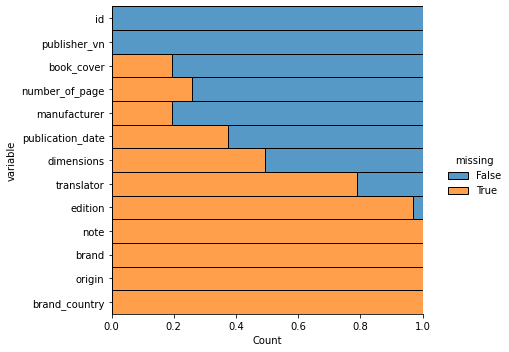

In [ ]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df_specification.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.show

# Reviews

In [ ]:
df_review = pd.read_csv(review_path)

In [ ]:
print(df_review)

              id   product_id     user_id            user_name  rating                                            content  thank_count  rating_average  count
0       15875422  141483251.0   1585119.0          Thảo Nguyên       5             Sách đẹp đóng gói cẩn thận, ship nhanh            0             4.9      1
1       16437155  141483251.0   7931652.0        vantoan duong       5                                       tôi hài lòng            0             4.9      1
2       17456235  141483251.0   6001429.0               Mơ Mèo       5                                                NaN            0             4.9      1
3       14694996  141483251.0  14361212.0     Nguyễn Thanh Thế       5                                           sach hay            0             4.9      1
4       14205744  125362334.0      1176.0              Ca Phan       5                                                NaN            0             4.8      1
...          ...          ...         ...           

In [ ]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493092 entries, 0 to 493091
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              493092 non-null  int64  
 1   product_id      493092 non-null  float64
 2   user_id         493092 non-null  float64
 3   user_name       488145 non-null  object 
 4   rating          493092 non-null  int64  
 5   content         181946 non-null  object 
 6   thank_count     493092 non-null  int64  
 7   rating_average  493092 non-null  float64
 8   count           493092 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 33.9+ MB


### xoá id lỗi

In [ ]:
df_review = df_review.astype({"product_id":'float'})

In [ ]:
df_filtered2 = df_review[~df_review['product_id'].isin(list_error) ]
print(df_filtered2)

               id   product_id     user_id          user_name  rating                                            content  thank_count  rating_average
0        17128305  141483251.0  27857293.0       nguyễn Trinh       1  Chưa đọc nhưng lúc nhận là thấy khó chịu vì hộ...            0             4.9
1        17889488  141483251.0  10844450.0           Hong Thu       5  Sách cũng khá hữu ích, đọc tham khảo cho biết ...            0             4.9
2        16447472  141483251.0  11384697.0       David Nguyen       5  Những đánh giá, review chi tiết và những tiêu ...            0             4.9
3        17407937  141483251.0   5499213.0           Kiên Bùi       5  Sách này cực kỳ hữu ích cho cả bà bầu và bố nh...            0             4.9
4        17245854  141483251.0    161480.0  Nguyen Ngoc Hoang       5  sản phẩm giao nhanh, sản phẩm đúng như hình, s...            0             4.9
...           ...          ...         ...                ...     ...                               

In [ ]:
df_filtered2.to_csv(os.path.join(folder_path, 'final_reviews_35k.csv'), header=True, index=False)

### tính toán

In [ ]:
df_review

,id,product_id,user_id,user_name,rating,content,thank_count,rating_average,count
0,15875422,141483251.0,1585119.0,Thảo Nguyên,5,"Sách đẹp đóng gói cẩn thận, ship nhanh",0,4.9,1
1,16437155,141483251.0,7931652.0,vantoan duong,5,tôi hài lòng,0,4.9,1
2,17456235,141483251.0,6001429.0,Mơ Mèo,5,NaN,0,4.9,1
3,14694996,141483251.0,14361212.0,Nguyễn Thanh Thế,5,sach hay,0,4.9,1
4,14205744,125362334.0,1176.0,Ca Phan,5,NaN,0,4.8,1
...,...,...,...,...,...,...,...,...,...
493087,7962608,37793725.0,551813.0,Đinh Nho Anh,4,NaN,0,4.8,1
493088,3306921,37151279.0,16037020.0,Giuse Maria Vũ Trần,5,Thể loại tạp chí về y học rất hữu ích. Tiki đó...,0,4.7,1
493089,16804802,37151279.0,5647389.0,Minh Hieu Nguyen,5,NaN,0,4.7,1
493090,5215329,37151279.0,18551718.0,Nguyên Tường,3,NaN,0,4.7,1


In [ ]:
df_review['count'] = 1
df_group = df_review.groupby(['user_id']).count()[['count']].sort_values('count', ascending=False)
df_group = df_group.reset_index(level=['user_id'])

In [ ]:
df_group[df_group['count'] >= 30]

,user_id,count
0,10025671.0,561
1,13513176.0,415
2,7859171.0,401
3,1895509.0,365
4,12088578.0,347
...,...,...
2735,13446379.0,30
2736,11989006.0,30
2737,839188.0,30
2738,8343846.0,30


In [ ]:
df_review[df_review['user_id'] == 10025671.0]

,id,product_id,user_id,user_name,rating,content,thank_count,rating_average,count
6,17865779,125362334.0,10025671.0,Nguyễn Thế Vi,5,NaN,0,4.8,1
370,17289993,95218547.0,10025671.0,Nguyễn Thế Vi,5,NaN,0,4.9,1
566,17289993,95218547.0,10025671.0,Nguyễn Thế Vi,5,NaN,0,4.9,1
645,17118008,184782104.0,10025671.0,Nguyễn Thế Vi,5,NaN,0,4.9,1
2121,16029574,377644.0,10025671.0,Nguyễn Thế Vi,5,NaN,0,4.7,1
...,...,...,...,...,...,...,...,...,...
490753,17118164,97707995.0,10025671.0,Nguyễn Thế Vi,5,NaN,0,4.7,1
491859,17118190,8458240.0,10025671.0,Nguyễn Thế Vi,5,NaN,0,5.0,1
492091,16496601,540822.0,10025671.0,Nguyễn Thế Vi,5,NaN,0,4.4,1
492117,17118200,8458242.0,10025671.0,Nguyễn Thế Vi,4,NaN,0,4.8,1


In [ ]:
list_id_than_10 = list(df_group[df_group['count'] >= 30]['user_id'])
list_id_than_10

[10025671.0,
 13513176.0,
 7859171.0,
 1895509.0,
 12088578.0,
 14156527.0,
 98653.0,
 22456806.0,
 17506038.0,
 2415.0,
 599551.0,
 5253296.0,
 21500023.0,
 9745026.0,
 18278431.0,
 7333002.0,
 642183.0,
 12119040.0,
 5582356.0,
 1826533.0,
 17517042.0,
 22575012.0,
 5805473.0,
 1635513.0,
 68275.0,
 1997514.0,
 9786862.0,
 13620930.0,
 7031251.0,
 51302.0,
 20306686.0,
 22365637.0,
 6158890.0,
 1264228.0,
 1503284.0,
 8599820.0,
 5098906.0,
 138485.0,
 5953228.0,
 5362631.0,
 18273284.0,
 18313868.0,
 1868160.0,
 451499.0,
 18641722.0,
 20163704.0,
 15052614.0,
 19514032.0,
 1657646.0,
 13057248.0,
 11944614.0,
 6492212.0,
 15076836.0,
 470130.0,
 1039840.0,
 15169513.0,
 8293230.0,
 948689.0,
 8145881.0,
 9958303.0,
 21182697.0,
 20001780.0,
 5802944.0,
 6296758.0,
 6729273.0,
 18740986.0,
 18782481.0,
 18376295.0,
 22389499.0,
 1282193.0,
 17503292.0,
 18296997.0,
 547020.0,
 17794972.0,
 990696.0,
 20930168.0,
 18118699.0,
 171837.0,
 21169064.0,
 18795305.0,
 16760225.0,
 351432.

In [ ]:
#lọc ra các review của người mua >= 10 quyển thôi

df_review_final = df_review[df_review['user_id'].isin(list_id_than_10)]
df_review_final

,id,product_id,user_id,user_name,rating,content,thank_count,rating_average,count
2,17456235,141483251.0,6001429.0,Mơ Mèo,5,NaN,0,4.9,1
3,14694996,141483251.0,14361212.0,Nguyễn Thanh Thế,5,sach hay,0,4.9,1
6,17865779,125362334.0,10025671.0,Nguyễn Thế Vi,5,NaN,0,4.8,1
17,16034964,58213080.0,7214085.0,Lê Thụy Bích Vân,5,Các bà mẹ có con nhỏ nên trang bị 1 cuốn nhé. ...,0,4.9,1
20,17380083,58213080.0,27633370.0,Thuỷ Tiên,5,"Sách nhẹ, chất lượng tốt",0,4.9,1
...,...,...,...,...,...,...,...,...,...
493086,16514730,37793725.0,1248889.0,Lê Hoài Thương,5,Sách rất bổ ích,0,4.8,1
493087,7962608,37793725.0,551813.0,Đinh Nho Anh,4,NaN,0,4.8,1
493088,3306921,37151279.0,16037020.0,Giuse Maria Vũ Trần,5,Thể loại tạp chí về y học rất hữu ích. Tiki đó...,0,4.7,1
493089,16804802,37151279.0,5647389.0,Minh Hieu Nguyen,5,NaN,0,4.7,1


In [ ]:
df_review_final.to_csv(os.path.join(folder_path, 'final_reviews_than30.csv'), header=True, index=False)

In [ ]:
list_product_than_10 = list(set(df_review_final['product_id']))
len(list_product_than_10)

16589

In [ ]:
df_book

,category,url,id,sku,name,price,rating_average,review_count,all_time_quantity_sold,description,specifications,seller_id,seller_sku,seller_name,seller_store_id,count_specification,attributes
0,Nhà sách tiki/sách tiếng việt/sách bà mẹ em bé...,https://tiki.vn/product-p141483251.html?spid=1...,141483251.0,8.070578e+12,Sách: Thai Giáo Theo Chuyên Gia - 280 Ngày Mỗi...,80500.0,5.0,58.0,508.0,"\nThai Giáo Theo Chuyên Gia, 280 Ngày, Mỗi Ngà...","{""name"": ""Th\u00f4ng tin chung"", ""attributes"":...",36846.0,3.544877e+12,Minh Long Book,36125.0,5,"{'id': 141483251.0, 'publisher_vn': 'Minh Long..."
1,Nhà sách tiki/sách tiếng việt/sách bà mẹ em bé...,https://tiki.vn/product-p125362334.html?spid=1...,125362334.0,8.806987e+12,Dinh Dưỡng Thai Kỳ (Bà Bầu Ăn Gì Giúp Con Phát...,103950.0,4.8,41.0,486.0,“Dinh dưỡng thai kỳ” giống như một cuốn bách k...,"{""name"": ""Th\u00f4ng tin chung"", ""attributes"":...",1.0,6.946825e+12,Tiki Trading,40395.0,7,"{'id': 125362334.0, 'publisher_vn': 'Booklife'..."
2,Nhà sách tiki/sách tiếng việt/sách bà mẹ em bé...,https://tiki.vn/product-p58213080.html?spid=58...,58213080.0,4.467229e+12,Montessori – Phương Pháp Giáo Dục Toàn Diện Ch...,95200.0,5.0,16.0,116.0,MONTESSORI – PHƯƠNG PHÁP GIÁO DỤC TOÀN DIỆN CH...,"{""name"": ""Th\u00f4ng tin chung"", ""attributes"":...",53660.0,1.012848e+12,Nhà sách Fahasa,51001.0,6,"{'id': 58213080.0, 'publisher_vn': '1980 Books..."
3,Nhà sách tiki/sách tiếng việt/sách bà mẹ em bé...,https://tiki.vn/product-p52798281.html?spid=52...,52798281.0,9.856063e+12,Phương Pháp Giáo Dục Sớm Montessori Cho Trẻ Từ...,79200.0,5.0,15.0,115.0,Bạn đang có con ở độ tuổi 0-3? Đã bao giờ bạn ...,"{""name"": ""Th\u00f4ng tin chung"", ""attributes"":...",53660.0,4.504642e+12,Nhà sách Fahasa,51001.0,5,"{'id': 52798281.0, 'publisher_vn': '1980 Books..."
4,Nhà sách tiki/sách tiếng việt/sách bà mẹ em bé...,https://tiki.vn/product-p532292.html?spid=253150,532292.0,2.601852e+12,Học Montessori Để Dạy Trẻ Theo Phương Pháp Mon...,70000.0,4.8,4.0,72.0,Học Montessori Để Dạy Trẻ Theo Phương Pháp Mon...,"{""name"": ""Th\u00f4ng tin chung"", ""attributes"":...",53660.0,4.983970e+12,Nhà sách Fahasa,51001.0,5,"{'id': 532292.0, 'publisher_vn': 'Đinh Tị', 'b..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21938,Nhà sách tiki/sách tiếng việt/sách y học,https://tiki.vn/product-p80358871.html?spid=80...,80358871.0,8.339947e+12,Y Học Phổ Thông Dành Cho Mọi Người - Chuyên Đề...,23750.0,5.0,2.0,4.0,"Sách là cẩm nang cần thiết trong mỗi gia đình,...","{""name"": ""Th\u00f4ng tin chung"", ""attributes"":...",53660.0,3.338262e+12,Nhà sách Fahasa,51001.0,2,"{'id': 80358871.0, 'publisher_vn': 'DNTN Minh ..."
21939,Nhà sách tiki/sách tiếng việt/sách y học,https://tiki.vn/product-p72142066.html?spid=88...,72142066.0,9.211724e+12,Combo Sách : Dịch Bệnh - Kẻ Thù Nguy Hiểm Nhất...,323049.0,0.0,0.0,2.0,Dịch Bệnh- Kẻ Thù Nguy Hiểm Nhất\nCuốn sách nà...,"{""name"": ""Th\u00f4ng tin chung"", ""attributes"":...",145814.0,5.144417e+12,Omega Plus Books,134535.0,3,"{'id': 72142066.0, 'publisher_vn': 'Alphabooks..."
21940,Nhà sách tiki/sách tiếng việt/sách y học,https://tiki.vn/product-p37793725.html?spid=37...,37793725.0,7.602028e+12,Y Học Phổ Thông Dành Cho Mọi Người - Chuyên Đề...,17100.0,4.8,4.0,17.0,Y Học Phổ Thông Dành Cho Mọi Người - Chuyên Đề...,"{""name"": ""Th\u00f4ng tin chung"", ""attributes"":...",53660.0,7.199800e+12,Nhà sách Fahasa,51001.0,1,"{'id': 37793725.0, 'publisher_vn': 'CN NXB Tha..."
21941,Nhà sách tiki/sách tiếng việt/sách y học,https://tiki.vn/product-p37151279.html?spid=37...,37151279.0,9.891892e+12,Y Học Phổ Thông Dành Cho Mọi Người - Chuyên Đề...,23750.0,4.7,6.0,36.0,Y Học Phổ Thông Dành Cho Mọi Người - Chuyên Đề...,"{""name"": ""Th\u00f4ng tin chung"", ""attributes"":...",53660.0,2.452895e+12,Nhà sách Fahasa,51001.0,1,"{'id': 37151279.0, 'publisher_vn': 'NXB Thanh ..."


In [ ]:
#lọc ra các sách của người mua >= 10 quyển thôi
df_books_final = df_book[df_book['id'].isin(list_product_than_10)]
df_books_final

,category,url,id,sku,name,price,rating_average,review_count,all_time_quantity_sold,description,specifications,seller_id,seller_sku,seller_name,seller_store_id,count_specification,attributes
0,Nhà sách tiki/sách tiếng việt/sách bà mẹ em bé...,https://tiki.vn/product-p141483251.html?spid=1...,141483251.0,8.070578e+12,Sách: Thai Giáo Theo Chuyên Gia - 280 Ngày Mỗi...,80500.0,5.0,58.0,508.0,"\nThai Giáo Theo Chuyên Gia, 280 Ngày, Mỗi Ngà...","{""name"": ""Th\u00f4ng tin chung"", ""attributes"":...",36846.0,3.544877e+12,Minh Long Book,36125.0,5,"{'id': 141483251.0, 'publisher_vn': 'Minh Long..."
1,Nhà sách tiki/sách tiếng việt/sách bà mẹ em bé...,https://tiki.vn/product-p125362334.html?spid=1...,125362334.0,8.806987e+12,Dinh Dưỡng Thai Kỳ (Bà Bầu Ăn Gì Giúp Con Phát...,103950.0,4.8,41.0,486.0,“Dinh dưỡng thai kỳ” giống như một cuốn bách k...,"{""name"": ""Th\u00f4ng tin chung"", ""attributes"":...",1.0,6.946825e+12,Tiki Trading,40395.0,7,"{'id': 125362334.0, 'publisher_vn': 'Booklife'..."
2,Nhà sách tiki/sách tiếng việt/sách bà mẹ em bé...,https://tiki.vn/product-p58213080.html?spid=58...,58213080.0,4.467229e+12,Montessori – Phương Pháp Giáo Dục Toàn Diện Ch...,95200.0,5.0,16.0,116.0,MONTESSORI – PHƯƠNG PHÁP GIÁO DỤC TOÀN DIỆN CH...,"{""name"": ""Th\u00f4ng tin chung"", ""attributes"":...",53660.0,1.012848e+12,Nhà sách Fahasa,51001.0,6,"{'id': 58213080.0, 'publisher_vn': '1980 Books..."
3,Nhà sách tiki/sách tiếng việt/sách bà mẹ em bé...,https://tiki.vn/product-p52798281.html?spid=52...,52798281.0,9.856063e+12,Phương Pháp Giáo Dục Sớm Montessori Cho Trẻ Từ...,79200.0,5.0,15.0,115.0,Bạn đang có con ở độ tuổi 0-3? Đã bao giờ bạn ...,"{""name"": ""Th\u00f4ng tin chung"", ""attributes"":...",53660.0,4.504642e+12,Nhà sách Fahasa,51001.0,5,"{'id': 52798281.0, 'publisher_vn': '1980 Books..."
4,Nhà sách tiki/sách tiếng việt/sách bà mẹ em bé...,https://tiki.vn/product-p532292.html?spid=253150,532292.0,2.601852e+12,Học Montessori Để Dạy Trẻ Theo Phương Pháp Mon...,70000.0,4.8,4.0,72.0,Học Montessori Để Dạy Trẻ Theo Phương Pháp Mon...,"{""name"": ""Th\u00f4ng tin chung"", ""attributes"":...",53660.0,4.983970e+12,Nhà sách Fahasa,51001.0,5,"{'id': 532292.0, 'publisher_vn': 'Đinh Tị', 'b..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21937,Nhà sách tiki/sách tiếng việt/sách y học,https://tiki.vn/product-p68668523.html?spid=68...,68668523.0,3.639356e+12,Y Học Phổ Thông Dành Cho Mọi Người - Chuyên Đề...,23750.0,5.0,1.0,3.0,"Sách là cẩm nang cần thiết trong mỗi gia đình,...","{""name"": ""Th\u00f4ng tin chung"", ""attributes"":...",53660.0,8.924942e+12,Nhà sách Fahasa,51001.0,2,"{'id': 68668523.0, 'publisher_vn': 'DNTN Minh ..."
21938,Nhà sách tiki/sách tiếng việt/sách y học,https://tiki.vn/product-p80358871.html?spid=80...,80358871.0,8.339947e+12,Y Học Phổ Thông Dành Cho Mọi Người - Chuyên Đề...,23750.0,5.0,2.0,4.0,"Sách là cẩm nang cần thiết trong mỗi gia đình,...","{""name"": ""Th\u00f4ng tin chung"", ""attributes"":...",53660.0,3.338262e+12,Nhà sách Fahasa,51001.0,2,"{'id': 80358871.0, 'publisher_vn': 'DNTN Minh ..."
21940,Nhà sách tiki/sách tiếng việt/sách y học,https://tiki.vn/product-p37793725.html?spid=37...,37793725.0,7.602028e+12,Y Học Phổ Thông Dành Cho Mọi Người - Chuyên Đề...,17100.0,4.8,4.0,17.0,Y Học Phổ Thông Dành Cho Mọi Người - Chuyên Đề...,"{""name"": ""Th\u00f4ng tin chung"", ""attributes"":...",53660.0,7.199800e+12,Nhà sách Fahasa,51001.0,1,"{'id': 37793725.0, 'publisher_vn': 'CN NXB Tha..."
21941,Nhà sách tiki/sách tiếng việt/sách y học,https://tiki.vn/product-p37151279.html?spid=37...,37151279.0,9.891892e+12,Y Học Phổ Thông Dành Cho Mọi Người - Chuyên Đề...,23750.0,4.7,6.0,36.0,Y Học Phổ Thông Dành Cho Mọi Người - Chuyên Đề...,"{""name"": ""Th\u00f4ng tin chung"", ""attributes"":...",53660.0,2.452895e+12,Nhà sách Fahasa,51001.0,1,"{'id': 37151279.0, 'publisher_vn': 'NXB Thanh ..."


In [ ]:
df_books_final = df_books_final.reset_index(drop=True)

In [ ]:
len(set(df_books_final['id']))

16588

In [ ]:
df_books_final['id'][:10]

0    141483251.0
1    125362334.0
2     58213080.0
3     52798281.0
4       532292.0
5     69162891.0
6     68688353.0
7    158868221.0
8     95218451.0
9    158019962.0
Name: id, dtype: float64

In [ ]:
df_books_final#.drop([0])

In [ ]:
list_product_id_distin = []
ii = 1
for i in range(len(df_books_final['id'])):
  if (df_books_final['id'][i] in list_product_than_10) and (df_books_final['id'][i] not in list_product_id_distin):
    list_product_id_distin.append(df_books_final['id'][i])

  else: 
    df_books_final = df_books_final.drop([i])
    print(ii)
    ii += 1

In [ ]:
df_books_final = df_books_final.reset_index(drop = True)
df_books_final

,category,url,id,sku,name,price,rating_average,review_count,all_time_quantity_sold,description,specifications,seller_id,seller_sku,seller_name,seller_store_id,count_specification,attributes
0,Nhà sách tiki/sách tiếng việt/sách bà mẹ em bé...,https://tiki.vn/product-p141483251.html?spid=1...,141483251.0,8.070578e+12,Sách: Thai Giáo Theo Chuyên Gia - 280 Ngày Mỗi...,80500.0,5.0,58.0,508.0,"\nThai Giáo Theo Chuyên Gia, 280 Ngày, Mỗi Ngà...","{""name"": ""Th\u00f4ng tin chung"", ""attributes"":...",36846.0,3.544877e+12,Minh Long Book,36125.0,5,"{'id': 141483251.0, 'publisher_vn': 'Minh Long..."
1,Nhà sách tiki/sách tiếng việt/sách bà mẹ em bé...,https://tiki.vn/product-p125362334.html?spid=1...,125362334.0,8.806987e+12,Dinh Dưỡng Thai Kỳ (Bà Bầu Ăn Gì Giúp Con Phát...,103950.0,4.8,41.0,486.0,“Dinh dưỡng thai kỳ” giống như một cuốn bách k...,"{""name"": ""Th\u00f4ng tin chung"", ""attributes"":...",1.0,6.946825e+12,Tiki Trading,40395.0,7,"{'id': 125362334.0, 'publisher_vn': 'Booklife'..."
2,Nhà sách tiki/sách tiếng việt/sách bà mẹ em bé...,https://tiki.vn/product-p58213080.html?spid=58...,58213080.0,4.467229e+12,Montessori – Phương Pháp Giáo Dục Toàn Diện Ch...,95200.0,5.0,16.0,116.0,MONTESSORI – PHƯƠNG PHÁP GIÁO DỤC TOÀN DIỆN CH...,"{""name"": ""Th\u00f4ng tin chung"", ""attributes"":...",53660.0,1.012848e+12,Nhà sách Fahasa,51001.0,6,"{'id': 58213080.0, 'publisher_vn': '1980 Books..."
3,Nhà sách tiki/sách tiếng việt/sách bà mẹ em bé...,https://tiki.vn/product-p52798281.html?spid=52...,52798281.0,9.856063e+12,Phương Pháp Giáo Dục Sớm Montessori Cho Trẻ Từ...,79200.0,5.0,15.0,115.0,Bạn đang có con ở độ tuổi 0-3? Đã bao giờ bạn ...,"{""name"": ""Th\u00f4ng tin chung"", ""attributes"":...",53660.0,4.504642e+12,Nhà sách Fahasa,51001.0,5,"{'id': 52798281.0, 'publisher_vn': '1980 Books..."
4,Nhà sách tiki/sách tiếng việt/sách bà mẹ em bé...,https://tiki.vn/product-p532292.html?spid=253150,532292.0,2.601852e+12,Học Montessori Để Dạy Trẻ Theo Phương Pháp Mon...,70000.0,4.8,4.0,72.0,Học Montessori Để Dạy Trẻ Theo Phương Pháp Mon...,"{""name"": ""Th\u00f4ng tin chung"", ""attributes"":...",53660.0,4.983970e+12,Nhà sách Fahasa,51001.0,5,"{'id': 532292.0, 'publisher_vn': 'Đinh Tị', 'b..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16583,Nhà sách tiki/sách tiếng việt/sách y học,https://tiki.vn/product-p68668523.html?spid=68...,68668523.0,3.639356e+12,Y Học Phổ Thông Dành Cho Mọi Người - Chuyên Đề...,23750.0,5.0,1.0,3.0,"Sách là cẩm nang cần thiết trong mỗi gia đình,...","{""name"": ""Th\u00f4ng tin chung"", ""attributes"":...",53660.0,8.924942e+12,Nhà sách Fahasa,51001.0,2,"{'id': 68668523.0, 'publisher_vn': 'DNTN Minh ..."
16584,Nhà sách tiki/sách tiếng việt/sách y học,https://tiki.vn/product-p80358871.html?spid=80...,80358871.0,8.339947e+12,Y Học Phổ Thông Dành Cho Mọi Người - Chuyên Đề...,23750.0,5.0,2.0,4.0,"Sách là cẩm nang cần thiết trong mỗi gia đình,...","{""name"": ""Th\u00f4ng tin chung"", ""attributes"":...",53660.0,3.338262e+12,Nhà sách Fahasa,51001.0,2,"{'id': 80358871.0, 'publisher_vn': 'DNTN Minh ..."
16585,Nhà sách tiki/sách tiếng việt/sách y học,https://tiki.vn/product-p37793725.html?spid=37...,37793725.0,7.602028e+12,Y Học Phổ Thông Dành Cho Mọi Người - Chuyên Đề...,17100.0,4.8,4.0,17.0,Y Học Phổ Thông Dành Cho Mọi Người - Chuyên Đề...,"{""name"": ""Th\u00f4ng tin chung"", ""attributes"":...",53660.0,7.199800e+12,Nhà sách Fahasa,51001.0,1,"{'id': 37793725.0, 'publisher_vn': 'CN NXB Tha..."
16586,Nhà sách tiki/sách tiếng việt/sách y học,https://tiki.vn/product-p37151279.html?spid=37...,37151279.0,9.891892e+12,Y Học Phổ Thông Dành Cho Mọi Người - Chuyên Đề...,23750.0,4.7,6.0,36.0,Y Học Phổ Thông Dành Cho Mọi Người - Chuyên Đề...,"{""name"": ""Th\u00f4ng tin chung"", ""attributes"":...",53660.0,2.452895e+12,Nhà sách Fahasa,51001.0,1,"{'id': 37151279.0, 'publisher_vn': 'NXB Thanh ..."


In [ ]:
df_books_final.head(10)

,category,url,id,sku,name,price,rating_average,review_count,all_time_quantity_sold,description,specifications,seller_id,seller_sku,seller_name,seller_store_id,count_specification,attributes
0,Nhà sách tiki/sách tiếng việt/sách bà mẹ em bé...,https://tiki.vn/product-p141483251.html?spid=1...,141483251.0,8.070578e+12,Sách: Thai Giáo Theo Chuyên Gia - 280 Ngày Mỗi...,80500.0,5.0,58.0,508.0,"\nThai Giáo Theo Chuyên Gia, 280 Ngày, Mỗi Ngà...","{""name"": ""Th\u00f4ng tin chung"", ""attributes"":...",36846.0,3.544877e+12,Minh Long Book,36125.0,5,"{'id': 141483251.0, 'publisher_vn': 'Minh Long..."
1,Nhà sách tiki/sách tiếng việt/sách bà mẹ em bé...,https://tiki.vn/product-p125362334.html?spid=1...,125362334.0,8.806987e+12,Dinh Dưỡng Thai Kỳ (Bà Bầu Ăn Gì Giúp Con Phát...,103950.0,4.8,41.0,486.0,“Dinh dưỡng thai kỳ” giống như một cuốn bách k...,"{""name"": ""Th\u00f4ng tin chung"", ""attributes"":...",1.0,6.946825e+12,Tiki Trading,40395.0,7,"{'id': 125362334.0, 'publisher_vn': 'Booklife'..."
2,Nhà sách tiki/sách tiếng việt/sách bà mẹ em bé...,https://tiki.vn/product-p58213080.html?spid=58...,58213080.0,4.467229e+12,Montessori – Phương Pháp Giáo Dục Toàn Diện Ch...,95200.0,5.0,16.0,116.0,MONTESSORI – PHƯƠNG PHÁP GIÁO DỤC TOÀN DIỆN CH...,"{""name"": ""Th\u00f4ng tin chung"", ""attributes"":...",53660.0,1.012848e+12,Nhà sách Fahasa,51001.0,6,"{'id': 58213080.0, 'publisher_vn': '1980 Books..."
3,Nhà sách tiki/sách tiếng việt/sách bà mẹ em bé...,https://tiki.vn/product-p52798281.html?spid=52...,52798281.0,9.856063e+12,Phương Pháp Giáo Dục Sớm Montessori Cho Trẻ Từ...,79200.0,5.0,15.0,115.0,Bạn đang có con ở độ tuổi 0-3? Đã bao giờ bạn ...,"{""name"": ""Th\u00f4ng tin chung"", ""attributes"":...",53660.0,4.504642e+12,Nhà sách Fahasa,51001.0,5,"{'id': 52798281.0, 'publisher_vn': '1980 Books..."
4,Nhà sách tiki/sách tiếng việt/sách bà mẹ em bé...,https://tiki.vn/product-p532292.html?spid=253150,532292.0,2.601852e+12,Học Montessori Để Dạy Trẻ Theo Phương Pháp Mon...,70000.0,4.8,4.0,72.0,Học Montessori Để Dạy Trẻ Theo Phương Pháp Mon...,"{""name"": ""Th\u00f4ng tin chung"", ""attributes"":...",53660.0,4.983970e+12,Nhà sách Fahasa,51001.0,5,"{'id': 532292.0, 'publisher_vn': 'Đinh Tị', 'b..."
5,Nhà sách tiki/sách tiếng việt/sách bà mẹ em bé...,https://tiki.vn/product-p69162891.html?spid=69...,69162891.0,4.062401e+12,Mang Thai Sinh Nở Và Nuôi Con Khỏe Mạnh Cuốn ...,212000.0,5.0,40.0,187.0,Mang Thai Sinh Nở Và Nuôi Con Khỏe Mạnh Cuốn s...,"{""name"": ""Th\u00f4ng tin chung"", ""attributes"":...",53660.0,6.725096e+12,Nhà sách Fahasa,51001.0,7,"{'id': 69162891.0, 'publisher_vn': 'BIZBOOKS',..."
6,Nhà sách tiki/sách tiếng việt/sách bà mẹ em bé...,https://tiki.vn/product-p68688353.html?spid=12...,68688353.0,3.000154e+12,Thai Kỳ Khỏe Mạnh - Vượt Cạn Bình An,74100.0,0.0,0.0,15.0,Có con là niềm vui cũng là thử thách lớn trong...,"{""name"": ""Th\u00f4ng tin chung"", ""attributes"":...",161219.0,8.738835e+12,Nhà Sách Trẻ Online,148433.0,6,"{'id': 68688353.0, 'publisher_vn': 'NXB Trẻ', ..."
7,Nhà sách tiki/sách tiếng việt/sách bà mẹ em bé...,https://tiki.vn/product-p158868221.html?spid=1...,158868221.0,6.791788e+12,Hành Trình Nuôi Con: Mang Thai - Cẩm Nang Thai...,573000.0,0.0,0.0,1.0,Hành Trình Nuôi Con: Mang Thai - Cẩm Nang Tha...,"{""name"": ""Th\u00f4ng tin chung"", ""attributes"":...",53660.0,6.803811e+12,Nhà sách Fahasa,51001.0,2,"{'id': 158868221.0, 'publisher_vn': 'Alpha Boo..."
8,Nhà sách tiki/sách tiếng việt/sách bà mẹ em bé...,https://tiki.vn/product-p95218451.html?spid=95...,95218451.0,1.024255e+12,Lần Đầu Làm Mẹ - Tổng Hợp Những Kiến Thức Mới ...,202800.0,5.0,22.0,186.0,Này những người phụ nữ lần đầu mang thai và sắ...,"{""name"": ""Th\u00f4ng tin chung"", ""attributes"":...",53660.0,2.743998e+12,Nhà sách Fahasa,51001.0,7,"{'id': 95218451.0, 'publisher_vn': 'Thái Hà', ..."
9,Nhà sách tiki/sách tiếng việt/sách bà mẹ em bé...,https://tiki.vn/product-p158019962.html?spid=1...,158019962.0,8.605414e+12,Combo 3 Cuốn Bộ Sách: Nuôi Con Không Phải Là C.

In [ ]:
df_books_final.to_csv(os.path.join('/content/drive/MyDrive/Ky1nam4/DoAnCuoiKy/Data_final/data_final/content-based/final_books_than30.csv'), header=True, index=False)

In [ ]:
pd.read_csv(os.path.join(folder_path, 'final_reviews_21k.csv'))

,id,product_id,user_id,user_name,rating,content,thank_count,rating_average,count
0,15875422,141483251.0,1585119.0,Thảo Nguyên,5,"Sách đẹp đóng gói cẩn thận, ship nhanh",0,4.9,1
1,16437155,141483251.0,7931652.0,vantoan duong,5,tôi hài lòng,0,4.9,1
2,17456235,141483251.0,6001429.0,Mơ Mèo,5,NaN,0,4.9,1
3,14694996,141483251.0,14361212.0,Nguyễn Thanh Thế,5,sach hay,0,4.9,1
4,14205744,125362334.0,1176.0,Ca Phan,5,NaN,0,4.8,1
...,...,...,...,...,...,...,...,...,...
493087,7962608,37793725.0,551813.0,Đinh Nho Anh,4,NaN,0,4.8,1
493088,3306921,37151279.0,16037020.0,Giuse Maria Vũ Trần,5,Thể loại tạp chí về y học rất hữu ích. Tiki đó...,0,4.7,1
493089,16804802,37151279.0,5647389.0,Minh Hieu Nguyen,5,NaN,0,4.7,1
493090,5215329,37151279.0,18551718.0,Nguyên Tường,3,NaN,0,4.7,1


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df_review_final,
                                   random_state=104, 
                                   test_size=0.01, 
                                   shuffle=True)

In [ ]:
X_test

,id,product_id,user_id,user_name,rating,content,thank_count,rating_average,count
388267,12729208,8886007.0,557452.0,Hiep Nguyen Xuan,5,sách quá hay và nhân văn,0,4.8,1
207592,16318722,33758313.0,5805473.0,Nguyễn Thành Nam,5,NaN,0,4.9,1
347662,7063818,21161832.0,7219187.0,Lê Cát Phương,5,NaN,0,4.9,1
195166,14223745,72935828.0,20262036.0,Duyen Ngoc,5,NaN,0,4.9,1
193277,6526828,44017480.0,148558.0,Bùi Thị Hải Đăng,5,Sách với khối kiến thức đồ sộ về thế giới dưới...,0,4.6,1
...,...,...,...,...,...,...,...,...,...
208091,14472586,111290696.0,13620930.0,Châu Lương,5,NaN,0,4.9,1
422044,6744130,17719728.0,1808501.0,Nguyên Nhật,5,ok,0,4.5,1
205313,14700425,98603995.0,11564633.0,Tran Thi Ngan Ha,4,NaN,0,4.8,1
169073,7735696,55462653.0,292183.0,Nguyễn Quỳnh Mai Hân,5,Sách được bao bọc rất đẹp. Thời gian giao hàng...,1,4.7,1


In [ ]:
X_test.to_csv(os.path.join('/content/drive/MyDrive/Ky1nam4/DoAnCuoiKy/Data_final/data_final/collaborative-fittering/final_reviews_test_than30.csv'), header=True, index=False)

In [ ]:
X_train.to_csv(os.path.join('/content/drive/MyDrive/Ky1nam4/DoAnCuoiKy/Data_final/data_final/collaborative-fittering/final_reviews_train_than30.csv'), header=True, index=False)

In [ ]:
pd.read_csv(os.path.join('/content/drive/MyDrive/Ky1nam4/DoAnCuoiKy/Data_final/data_final/content-based/final_books_than30.csv'))

,category,url,id,sku,name,price,rating_average,review_count,all_time_quantity_sold,description,specifications,seller_id,seller_sku,seller_name,seller_store_id,count_specification,attributes
0,Nhà sách tiki/sách tiếng việt/sách bà mẹ em bé...,https://tiki.vn/product-p141483251.html?spid=1...,141483251.0,8.070578e+12,Sách: Thai Giáo Theo Chuyên Gia - 280 Ngày Mỗi...,80500.0,5.0,58.0,508.0,"\nThai Giáo Theo Chuyên Gia, 280 Ngày, Mỗi Ngà...","{""name"": ""Th\u00f4ng tin chung"", ""attributes"":...",36846.0,3.544877e+12,Minh Long Book,36125.0,5,"{'id': 141483251.0, 'publisher_vn': 'Minh Long..."
1,Nhà sách tiki/sách tiếng việt/sách bà mẹ em bé...,https://tiki.vn/product-p125362334.html?spid=1...,125362334.0,8.806987e+12,Dinh Dưỡng Thai Kỳ (Bà Bầu Ăn Gì Giúp Con Phát...,103950.0,4.8,41.0,486.0,“Dinh dưỡng thai kỳ” giống như một cuốn bách k...,"{""name"": ""Th\u00f4ng tin chung"", ""attributes"":...",1.0,6.946825e+12,Tiki Trading,40395.0,7,"{'id': 125362334.0, 'publisher_vn': 'Booklife'..."
2,Nhà sách tiki/sách tiếng việt/sách bà mẹ em bé...,https://tiki.vn/product-p58213080.html?spid=58...,58213080.0,4.467229e+12,Montessori – Phương Pháp Giáo Dục Toàn Diện Ch...,95200.0,5.0,16.0,116.0,MONTESSORI – PHƯƠNG PHÁP GIÁO DỤC TOÀN DIỆN CH...,"{""name"": ""Th\u00f4ng tin chung"", ""attributes"":...",53660.0,1.012848e+12,Nhà sách Fahasa,51001.0,6,"{'id': 58213080.0, 'publisher_vn': '1980 Books..."
3,Nhà sách tiki/sách tiếng việt/sách bà mẹ em bé...,https://tiki.vn/product-p52798281.html?spid=52...,52798281.0,9.856063e+12,Phương Pháp Giáo Dục Sớm Montessori Cho Trẻ Từ...,79200.0,5.0,15.0,115.0,Bạn đang có con ở độ tuổi 0-3? Đã bao giờ bạn ...,"{""name"": ""Th\u00f4ng tin chung"", ""attributes"":...",53660.0,4.504642e+12,Nhà sách Fahasa,51001.0,5,"{'id': 52798281.0, 'publisher_vn': '1980 Books..."
4,Nhà sách tiki/sách tiếng việt/sách bà mẹ em bé...,https://tiki.vn/product-p532292.html?spid=253150,532292.0,2.601852e+12,Học Montessori Để Dạy Trẻ Theo Phương Pháp Mon...,70000.0,4.8,4.0,72.0,Học Montessori Để Dạy Trẻ Theo Phương Pháp Mon...,"{""name"": ""Th\u00f4ng tin chung"", ""attributes"":...",53660.0,4.983970e+12,Nhà sách Fahasa,51001.0,5,"{'id': 532292.0, 'publisher_vn': 'Đinh Tị', 'b..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16583,Nhà sách tiki/sách tiếng việt/sách y học,https://tiki.vn/product-p68668523.html?spid=68...,68668523.0,3.639356e+12,Y Học Phổ Thông Dành Cho Mọi Người - Chuyên Đề...,23750.0,5.0,1.0,3.0,"Sách là cẩm nang cần thiết trong mỗi gia đình,...","{""name"": ""Th\u00f4ng tin chung"", ""attributes"":...",53660.0,8.924942e+12,Nhà sách Fahasa,51001.0,2,"{'id': 68668523.0, 'publisher_vn': 'DNTN Minh ..."
16584,Nhà sách tiki/sách tiếng việt/sách y học,https://tiki.vn/product-p80358871.html?spid=80...,80358871.0,8.339947e+12,Y Học Phổ Thông Dành Cho Mọi Người - Chuyên Đề...,23750.0,5.0,2.0,4.0,"Sách là cẩm nang cần thiết trong mỗi gia đình,...","{""name"": ""Th\u00f4ng tin chung"", ""attributes"":...",53660.0,3.338262e+12,Nhà sách Fahasa,51001.0,2,"{'id': 80358871.0, 'publisher_vn': 'DNTN Minh ..."
16585,Nhà sách tiki/sách tiếng việt/sách y học,https://tiki.vn/product-p37793725.html?spid=37...,37793725.0,7.602028e+12,Y Học Phổ Thông Dành Cho Mọi Người - Chuyên Đề...,17100.0,4.8,4.0,17.0,Y Học Phổ Thông Dành Cho Mọi Người - Chuyên Đề...,"{""name"": ""Th\u00f4ng tin chung"", ""attributes"":...",53660.0,7.199800e+12,Nhà sách Fahasa,51001.0,1,"{'id': 37793725.0, 'publisher_vn': 'CN NXB Tha..."
16586,Nhà sách tiki/sách tiếng việt/sách y học,https://tiki.vn/product-p37151279.html?spid=37...,37151279.0,9.891892e+12,Y Học Phổ Thông Dành Cho Mọi Người - Chuyên Đề...,23750.0,4.7,6.0,36.0,Y Học Phổ Thông Dành Cho Mọi Người - Chuyên Đề...,"{""name"": ""Th\u00f4ng tin chung"", ""attributes"":...",53660.0,2.452895e+12,Nhà sách Fahasa,51001.0,1,"{'id': 37151279.0, 'publisher_vn': 'NXB Thanh ..."


In [ ]:
pd.read_csv(os.path.join('/content/drive/MyDrive/Ky1nam4/DoAnCuoiKy/Data_final/data_final/collaborative-fittering/final_reviews_test_than30.csv'))

,id,product_id,user_id,user_name,rating,content,thank_count,rating_average,count
0,12729208,8886007.0,557452.0,Hiep Nguyen Xuan,5,sách quá hay và nhân văn,0,4.8,1
1,16318722,33758313.0,5805473.0,Nguyễn Thành Nam,5,NaN,0,4.9,1
2,7063818,21161832.0,7219187.0,Lê Cát Phương,5,NaN,0,4.9,1
3,14223745,72935828.0,20262036.0,Duyen Ngoc,5,NaN,0,4.9,1
4,6526828,44017480.0,148558.0,Bùi Thị Hải Đăng,5,Sách với khối kiến thức đồ sộ về thế giới dưới...,0,4.6,1
...,...,...,...,...,...,...,...,...,...
1418,14472586,111290696.0,13620930.0,Châu Lương,5,NaN,0,4.9,1
1419,6744130,17719728.0,1808501.0,Nguyên Nhật,5,ok,0,4.5,1
1420,14700425,98603995.0,11564633.0,Tran Thi Ngan Ha,4,NaN,0,4.8,1
1421,7735696,55462653.0,292183.0,Nguyễn Quỳnh Mai Hân,5,Sách được bao bọc rất đẹp. Thời gian giao hàng...,1,4.7,1


In [ ]:
df_group[df_group['count'] >= 5]['count'].value_counts()

5      22835
6      15489
7      10772
8       7702
9       5777
       ...  
169        1
172        1
174        1
175        1
96         1
Name: count, Length: 184, dtype: int64

In [ ]:
df_review['count'] = 1
df_group = df_review.groupby(['user_id']).count()[['count']].sort_values('count', ascending=False)
df_group = df_group.reset_index(level=['user_id'])

In [ ]:
# Số người dùng còn lại khi lọc ra theo số lượng sách đã đánh giá
for i in [2, 3, 5, 7, 10, 15,20,25, 30]:
    print(f"{i} => {len(df_group[df_group['count'] >= i])}")

2 => 26707
3 => 26707
5 => 26707
7 => 26707
10 => 26707
15 => 12040
20 => 6604
25 => 4119
30 => 2740


# Book Specification

In [ ]:
df_book_specification = pd.read_csv(specification_file_path)

In [ ]:
columns_vi = ['Id',
              'Danh mục',
              'URL',
              'SKU',
              'Tên',
              'Giá',
              'Trung bình đánh giá',
              'Tống số lượng đánh giá',
              'Số lượng đã bán',
              'Mô tả',
              'Id nhà bán',
              'Tên nhà bán',
              'SKU nhà bán',
              'Id cửa hàng nhà bán',
              'Công ty phát hành',
              'Loại bìa',
              'Số trang',
              'Nhà xuất bản',
              'Ngày xuất bản',
              'Kích thước',
              'Dịch Giả',
              'Phiên bản',
              'Lưu ý',
              'Thương hiệu',
              'Xuất xứ',
              'Xuất xứ thương hiệu']

df_book_specification.columns = columns_vi

In [ ]:
print(df_book_specification)

              Id                Danh mục                                                URL            SKU                                                Tên     Giá  Trung bình đánh giá  Tống số lượng đánh giá  Số lượng đã bán                                              Mô tả  ...  Số trang                             Nhà xuất bản        Ngày xuất bản      Kích thước                     Dịch Giả Phiên bản Lưu ý Thương hiệu Xuất xứ Xuất xứ thương hiệu
0       45823892  Sách chính trị pháp lý  https://tiki.vn/product-p45823892.html?spid=45...  5035038406451                Bộ Luật Lao Động (sửa đổi) Năm 2019   40000                  5.0                     262           2269.0  Bộ luật Lao động số 45/2019/QH14 được Quốc hội...  ...       160                    Nhà Xuất Bản Lao Động                  NaN             NaN                          NaN       NaN   NaN         NaN     NaN                 NaN
1        2717593  Sách chính trị pháp lý  https://tiki.vn/product-p2717593.html?spid=3

In [ ]:
# Số lượng sách trên từng danh mục
df_book_specification.groupby('Danh mục')['Id'].count()

Danh mục
Sách bà mẹ em bé               751
Sách chính trị pháp lý         746
Sách công nghệ thông tin       299
Sách giáo khoa giáo trình      726
Sách học ngoại ngữ             746
Sách khoa học kỹ thuật         741
Sách kinh tế                   754
Sách kiến thức tổng hợp        754
Sách kỹ năng sống              710
Sách lịch sử                   749
Sách nông lâm ngư nghiệp       125
Sách tham khảo                 747
Sách thiếu nhi                 758
Sách thường thức gia đình      743
Sách tâm lý giới tính          684
Sách tôn giáo tâm linh         747
Sách văn hóa địa lý du lịch    745
Sách văn học                   762
Sách y học                     739
Thể dục thể thao               348
Truyện tranh, manga, comic     753
Tạp chí catalogue              365
Từ điển                        638
Điện ảnh nhạc họa              724
Name: Id, dtype: int64

In [ ]:
import re
import numpy as np

TAG_RE = re.compile(r'<[^>]+>')

# Làm sạch dữ liệu cột dimension
def cleaning_dimension(text):

    # Dữ liệu không phải dạng str
    if not type(text) is str:
        return text
        
    # Xóa các tag trong string, xóa new line, thay "," thành "."
    removed_tags_text = TAG_RE.sub('', text)
    final_text = re.sub('\s{2,}', ' ', removed_tags_text).replace('\n', '').strip().replace(',', '.')
    
    # Bỏ qua một số dòng dữ liệu
    if final_text.startswith('Biên soạn') or final_text.startswith('Normal') or final_text.startswith('DxRxC'):
        return None

    return final_text

# Làm sạch cột dimensions
df_book_specification['dimensions'] = df_book_specification['dimensions'].apply(cleaning_dimension)

In [ ]:
NUM_RE = r'[-+]?(?:\d*\.\d+|\d+)'

# Tìm các số trong chuỗi
def extracting_number(text):
    num_list = re.findall(NUM_RE, text)
    if len(num_list) == 1:
        return None

In [ ]:
len(df_book_specification[~df_book_specification['dimensions'].isna()]['dimensions'].unique())

1274

In [ ]:
NUM_RE = r'[-+]?(?:\d*\.\d+|\d+)'
for i in df_book_specification[~df_book_specification['dimensions'].isna()]['dimensions'].unique():
    i_clean = cleaning_dimension(i)
    num_list = re.findall(NUM_RE, i_clean)
    if len(num_list) == 1:
        print(f"{i_clean} => {num_list}")

750 => ['750']
350 => ['350']
Số trang 244  => ['244']
100 => ['100']
1 cuốn sách => ['1']
350g => ['350']
580 => ['580']
